Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Laboratorijska vježba 4: Neparametarski modeli i vrednovanje modela

(c) 2015 Jan Šnajder, Domagoj Alagić

*Verzija 0.1*

Objavljeno: **7. siječnja 2016.**<br>
Rok za predaju: **11-15. siječnja 2016.**

## Upute

Laboratorijska vježba 4 sastoji se od 8 zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne biste samo čitali).

Osigurajte da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Pomoćna funkcija za iscrtavanje ulaznog prostora primjera i granice između klasa:

In [2]:
def plot_problem(X, y, h=None, surfaces=True) :
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision boundaries (surfaces=False) or decision surfaces (surfaces=True)
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h != None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if shape(Z_test) == () :
                # h returns a scalar when applied to a matrix; map explicitly
                Z = sp.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = sp.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if surfaces :
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        else :
            plt.contour(xx, yy, Z)
    # Plot the dataset
    scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired,marker='o',s=50);

## Zadatci

### 1. Implementacija algoritma k-nn

### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za treniranje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html)). Nije potrebno implementirati težinsku funkciju.

In [3]:
from scipy.linalg import norm
import heapq

# Vaš kôd ovdje...
class Knn:
    def __init__(self,k=3):
        self.k = k
        
    def fit(self,X,y):
        self.samples = sp.array(X)
        self.out = sp.array(y)
        self.classes =  sp.unique(y)
        
    def predict(self,X):
        y_predict = sp.array(zeros(X.shape[0]))
        for i in range(X.shape[0]):
            distance = []
            for sample in self.samples:
                distance.append(norm(X[i]-sample))
            indeces = [(k,distance[k]) for k in range(len(distance))]#indeks udaljenost
            indeces = sorted(indeces,key=lambda dist : dist[1])[:self.k]
            tmp =  numpy.array([])
            for c in self.classes:
                suma = 0
                for  ind,dist  in indeces:
                    if c==self.out[ind] :
                        suma+=1
                tmp = np.hstack((tmp,suma))
            y_predict[i]=self.classes[numpy.argmax(tmp)]
        return y_predict

### (b)

Isprobajte algoritam implementiran u (a) dijelu zadatka na umjetno generiranome skupu s $n=2$ značajke, $K=2$ klase i $N=100$ primjera. Provjerite ispravnost algoritma tako da predikcije usporedite s onima algoritma [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

Točno klasificirano : 100 primjera.


/home/ante/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


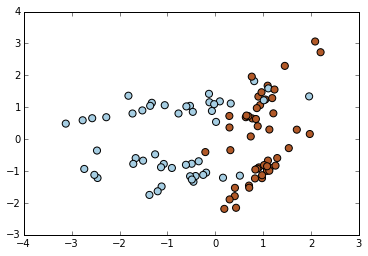

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
plot_problem(X, y)

# Vaš kôd ovdje...
knnMoj = Knn()
knnMoj.fit(X,y)
y_moj = knnMoj.predict(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
print("Točno klasificirano : " + str(sum(knn.predict(X)==y_moj))+" primjera.")

### (c) 

Pomoću funkcije `plot_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

/home/ante/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


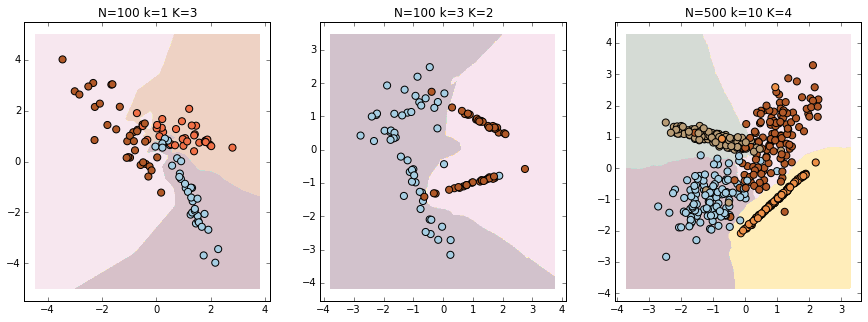

In [5]:
# Vaš kôd ovdje...
fig = plt.figure(3,figsize=(15,5))
fig.add_subplot(1,3,2)
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
plt.title("N=%d k=%d K=%d"%(100,3,2))
plot_problem(X,y,knn.predict)
fig.add_subplot(1,3,3)
X, y = make_classification(n_samples=500, n_features=2,n_classes=4, n_redundant=0, n_clusters_per_class=1)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)
plt.title("N=%d k=%d K=%d"%(500,10,4))
plot_problem(X,y,knn.predict)
fig.add_subplot(1,3,1)
X, y = make_classification(n_samples=100, n_features=2,n_classes=3, n_redundant=0, n_clusters_per_class=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
plt.title("N=%d k=%d K=%d"%(100,1,3))
plot_problem(X,y,knn.predict)


**Q:** Kako hiperparametar $k$ utječe na izgled granice između klasa?
    
**Q:** U kojem slučaju (za koju vrijednost $k$) pogreška učenja može doseći nulu? Zašto?
    
**Q:** Kako biste odredili optimalnu vrijednost za $k$?

### 2. Empirijska analiza algoritma k-nn

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj parametar izravno utječe na složenost algoritma, pa je važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$. Svrha ovog zadatka jest provesti sustavnu empirijsku analizu ovih ovisnosti.

### (a)

Sintetički skup primjera od $N=200$ primjera s $n=2$ značajke i $K=2$ klase podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3 (koristite funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). Iscrtajte krivulje pogreške učenja i pogreške ispitivanja za $k\in\{1,20\}$.

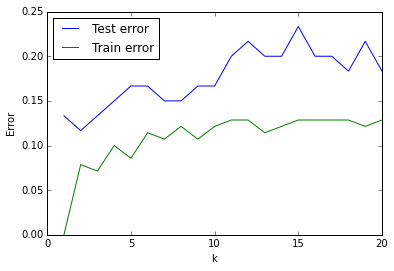

In [11]:
from sklearn.cross_validation import train_test_split

X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2,random_state=42)
# Vaš kôd ovdje...
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)
err = []
train = []
ran = range(1,21)
for k in ran:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    err.append(1-knn.score(X_test,y_test))
    train.append(1-knn.score(X_train,y_train))
plt.ylabel("Error")
plt.xlabel("k")

plt.plot(ran,err,label="Test error")
plt.plot(ran,train,label="Train error")
plt.legend(loc="best")
plt.show()

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto?

**Q:** Jesu li ovi rezultati stabilni? Zašto?

### (b) 

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogreška. Definirajte funkciju

> `knn_eval(X, y, n_instances, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira model k-nn na skupu primjera `(X,y)` (ukupno `n_instances` primjera), i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući svaki puta nov skup podataka pomoću funkcije `make_classification`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Svaki generirani skup primjera treba pomoću funkcije `train_test_split` podijeliti na skup za učenje i skup za ispitivanje, pri čemu je udio skupa za ispitivanje definiran  parametrom `test_size`. Tu podjelu nije potrebno dodatno ponavljati; dovoljno je što se u svakoj iteraciji generira posve nov skup primjera. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [69]:
# Vaš kôd ovdje...
def knn_eval(n_instances, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    train = []
    test = []
    for k in range(k_range[0],k_range[1]+1):
        tr_err = 0.
        test_err = 0.
        for i in range(n_trials):
            X, y = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes, n_redundant=0, n_informative=n_informative, n_clusters_per_class=1)
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train,y_train)
            tr_err += 1-knn.score(X_train,y_train)
            test_err += 1-knn.score(X_test,y_test)
        train.append(tr_err/n_trials)
        test.append(test_err/n_trials)
    train_errors = sp.array(train)
    test_errors = sp.array(test)
    ind = sp.argmin(test_errors)
    return ind+k_range[0],train_errors,test_errors

### (c)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

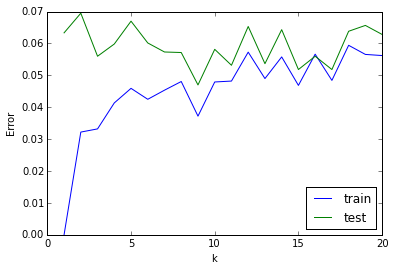

Optimal k is :9


In [27]:
# Vaš kôd ovdje...
best_k, train_errors, test_errors = knn_eval(200)
plt.xlabel("k")
plt.ylabel("Error")
plt.plot(range(1,21),train_errors,label="train")
plt.plot(range(1,21),test_errors,label="test")
plt.legend(loc="best")
plt.show()
print("Optimal k is :"+str(best_k))

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (d)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,20\}$, za $N=\{50, 100, 200, 500, 1000, 5000\}$ primjera. Načinite 6 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

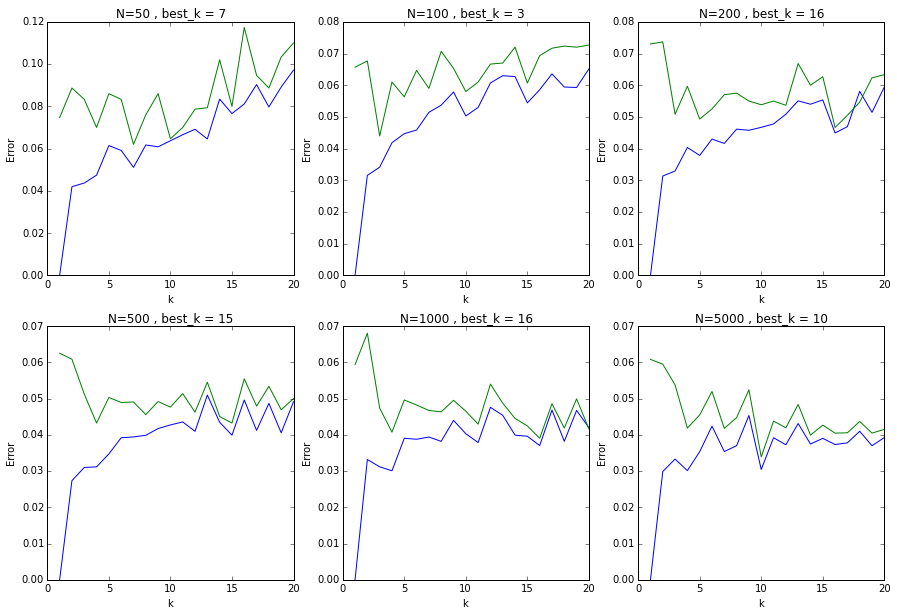

In [29]:
# Vaš kôd ovdje...
fig = plt.figure(6,figsize=(15,10))
ran = range(1,21)
for i,n in enumerate([50,100,200,500,1000,5000],1):
    fig.add_subplot(2,3,i)
    best_k,train,test = knn_eval(n)
    plt.title("N=%d , best_k = %d"%(n,best_k))
    plt.ylabel("Error")
    plt.xlabel("k")
    plt.plot(ran,train,label="train")
    plt.plot(ran,test,label="test")

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (e)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,20\}$, za broj dimenzija $n=\{2,3,\dots,10\}$, i to za $N=200$ primjera. Načinite 8 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

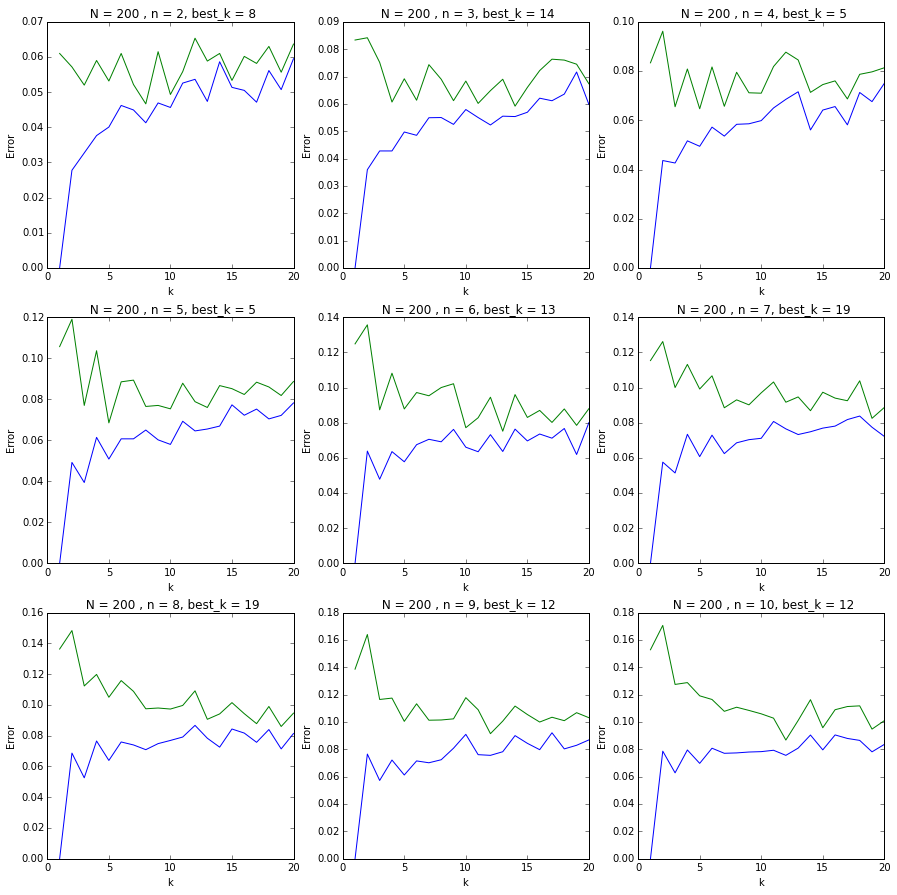

In [31]:
# Vaš kôd ovdje...
fig = plt.figure(9,figsize=(15,15))
ran = range(1,21)
for i,n in enumerate(range(2,11),1):
    fig.add_subplot(3,3,i)
    best_k,train,test = knn_eval(200,n_features=n)
    plt.title(" N = %d , n = %d, best_k = %d"%(200,n,best_k))
    plt.ylabel("Error")
    plt.xlabel("k")
    plt.plot(ran,train,label="train")
    plt.plot(ran,test,label="test")

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (f)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,20\}$, za broj klasa $K=\{2,3,4,5\}$, i to za $N=200$ primjera. Načinite 4 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

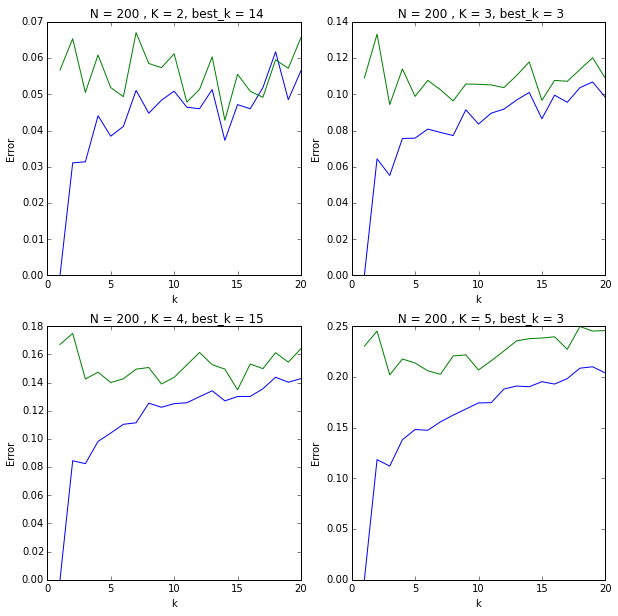

In [38]:
# Vaš kôd ovdje...
fig = plt.figure(4,figsize=(10,10))
ran = range(1,21)
for i,n in enumerate(range(2,6),1):
    fig.add_subplot(2,2,i)
    if n != 5 :
        best_k,train,test = knn_eval(200,n_classes=n)
    else :
        best_k,train,test = knn_eval(200,n_classes=n,n_features=3,n_informative=3)
    plt.title(" N = %d , K = %d, best_k = %d"%(200,n,best_k))
    plt.ylabel("Error")
    plt.xlabel("k")
    plt.plot(ran,train,label="train")
    plt.plot(ran,test,label="test")

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (g)

U prethodnim zadatcima analizirali smo oblik krivulja pogreška u ovisnosti o $k$, za nekoliko odabranih vrijednosti parametara $N$, $n$ odnosno $K$. Tako dobiveni uvidi su korisni, međutim, u praksi ćemo vrijednost za $k$ optimirati na skupu za provjeru, pa nas zapravo zanima kako se pogreške ponašaju uz optimalnu vrijednost za $k$. 

Koristeću funkciju `knn_eval` iz (b) dijela zadatka, generirajte grafikone koji prikazuju pogreške učenja i ispitivanja za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja), i to (1) u ovisnosti o broju primjera ($N\in\{100, 200,\dots, 1000\}$), (2) broju značajki ($n\in\{2,\dots,10\})$ i (3) broju klasa ($K\in\{2,10\})$. Posljednja dva grafikona generirajte s $N=1000$ primjera. Ukupno trebate generirati tri grafikona, svaki s dvije krivulje (pogreška učenja i pogreška ispitivanja).

In [41]:
# Vaš kôd ovdje...
list_N_train = []
list_N_test = []
for n in range(100,1100,100):
    best_k,train,test = knn_eval(n)
    list_N_train.append(train[best_k-1])
    list_N_test.append(test[best_k-1])

In [42]:
list_n_train = []
list_n_test = []
for n in range(2,11):
    best_k,train,test = knn_eval(1000,n_features=n)
    list_n_train.append(train[best_k-1])
    list_n_test.append(test[best_k-1])

In [45]:
list_k_train = []
list_k_test = []
for k in range(2,11):
    if k < 5:
        best_k,train,test = knn_eval(1000,n_classes=k)
    elif k < 9:
        best_k,train,test = knn_eval(1000,n_classes=k,n_features=3,n_informative=3)
    else:
        best_k,train,test = knn_eval(1000,n_classes=k,n_features=4,n_informative=4)
    list_k_train.append(train[best_k-1])
    list_k_test.append(test[best_k-1])


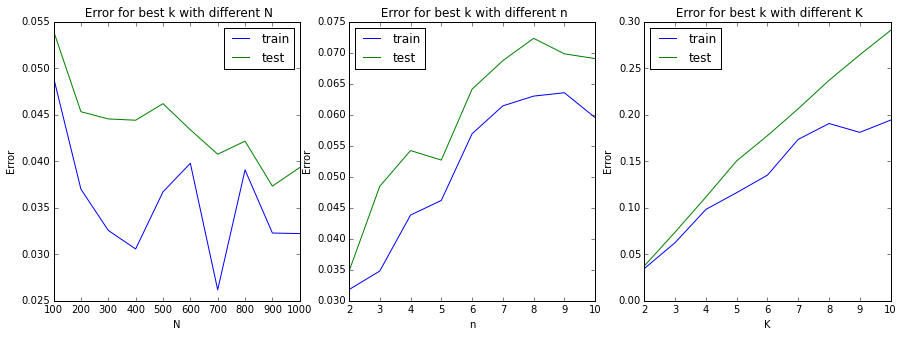

In [48]:
fig = plt.figure(3,figsize=(15,5))
fig.add_subplot(1,3,1)
plt.title(" Error for best k with different N ")
plt.ylabel("Error")
plt.xlabel("N")
plt.plot(range(100,1100,100),list_N_train,label="train")
plt.plot(range(100,1100,100),list_N_test,label="test")
plt.legend(loc="best")

fig.add_subplot(1,3,2)
plt.title(" Error for best k with different n ")
plt.ylabel("Error")
plt.xlabel("n")
plt.plot(range(2,11),list_n_train,label="train")
plt.plot(range(2,11),list_n_test,label="test")
plt.legend(loc="best")

fig.add_subplot(1,3,3)
plt.title(" Error for best k with different K ")
plt.ylabel("Error")
plt.xlabel("K")
plt.plot(range(2,11),list_k_train,label="train")
plt.plot(range(2,11),list_k_test,label="test")
plt.legend(loc="best")
plt.show()

**Q:** Jesu li rezultati očekivani? Obrazložite.

### 3. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

### (a)

Pomoću funkcije `make_classification` generirajte skup od $N=200$ primera sa $n=2$ značajke i $K=2$ klase. Postavite `n_reduntant=0` i `n_clusters_per_class=2`. Zatim napravite kopiju tog skupa podataka i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost da oba skupa podijelite na identičan način, tako da se skupovi za učenje i ispitivanje oni u konačnici razlikuju jedino u tome što jedan ima jednu dimenziju skaliranu. Trenirajte modele k-nn na skaliranoj i neskaliranoj varijanti skupa za učenje, a zatim ispitajte model na odgovarajućim ispitnim varijantama skupova.

In [53]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

# Vaš kôd ovdje...
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_copy_train = sp.array(X_train)
X_copy_train[:,0] = 100*X_copy_train[:,0]

X_copy_test = sp.array(X_test)
X_copy_test[:,0] = 100*X_copy_test[:,0]

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Non scale version acc:" + str(knn.score(X_test,y_test)))
knn = KNeighborsClassifier()
knn.fit(X_copy_train,y_train)
print("Scale version acc:" + str(knn.score(X_copy_test,y_test)))

Non scale version acc:0.933333333333
Scale version acc:0.433333333333


**Q:** Jesu li rezultati očekivani? Obrazložite.

### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (2b), jer ćemo na taj način dobiti pouzdanije procjene.

Generirajte dva skupa primjera, oba sa $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

In [70]:
# Vaš kôd ovdje...
best_k,train,test = knn_eval(1000,10,5,10)
best_k_noninfo,train_noninfo,test_noninfo = knn_eval(1000,10,5,5)
print("Error with all informative features:\n\tTrain: %f\n\tTest: %f"%(train[best_k+1],test[best_k-1]))
print("Error with half informative features:\n\tTrain: %f\n\tTest: %f"%(train_noninfo[best_k_noninfo-1],test_noninfo[best_k_noninfo+1]))

Error with all informative features:
	Train: 0.095843
	Test: 0.125400
Error with half informative features:
	Train: 0.153286
	Test: 0.198667


### (c)

U prethodnom zadatku ograničili smo se na slučaj kada je samo pola značajki bitnih. Načinite grafikon optimalne ispitne pogreške (za optimalan $k$) kao funkcije broja bitnih značajki u intervalu $\{5,\dots,20\}$. Ukupan broj značajki neka je uvijek $n=20$. Radi  usporedbe, ponovite isti izračun za model logističke regresije iz [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Na istome grafikonu prikažite krivulje ispitne pogreške za oba modela.

In [71]:
# Vaš kôd ovdje...
train_knn = []
test_knn = []
for inf in range(5,21):
    print(inf)
    best_k,train,test = knn_eval(n_instances=1000,n_features=20,n_classes=5,n_informative=inf)
    train_knn.append(train[best_k-1])
    test_knn.append(test[best_k-1])

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [74]:
from sklearn.linear_model import LogisticRegression
train_lr = []
test_lr = []
for inf in range(5,21):
    print(inf)
    train = []
    test = []
    for k in range(1,21):
        tr_err = 0.
        test_err = 0.
        for i in range(100):
            X, y = make_classification(n_samples=1000, n_features=20, n_classes=5, n_redundant=0, n_informative=inf, n_clusters_per_class=1)
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
            lr = LogisticRegression(C=k,n_jobs=6)
            lr.fit(X_train,y_train)
            tr_err += 1-lr.score(X_train,y_train)
            test_err += 1-lr.score(X_test,y_test)
        train.append(tr_err/100)
        test.append(test_err/100)
    train_errors = sp.array(train)
    test_errors = sp.array(test)
    ind = sp.argmin(test_errors)
    train_lr.append(train_errors[ind])
    test_lr.append(test_errors[ind])

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


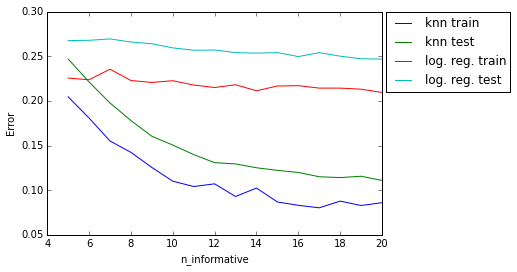

In [95]:
plt.plot(range(5,21),train_knn,label="knn train")
plt.plot(range(5,21),test_knn,label="knn test")
plt.plot(range(5,21),train_lr,label="log. reg. train")
plt.plot(range(5,21),test_lr,label="log. reg. test")
plt.xlabel("n_informative")
plt.ylabel("Error")
plt.legend(bbox_to_anchor=(1.4, 1.025))
plt.show()

**Q:** Koji je model manje robusan na prisustvo nebitnih značajki? Što mislite, zašto je tomu tako?

### *4. "Prokletstvo dimenzionalnosti"

<span style="color:green">(Rješavanje ovog zadatka nije obavezno već donosi dodatne bodove.)</span>

["Prokletstvo dimenzionalnosti"](https://en.wikipedia.org/wiki/Curse_of_dimensionality) zbirni je naziv za niz fenomena povezanih s visokodimenzijskim prostorima. Ti fenomeni, koji se uglavnom protive našoj intuiciji, u većini slučajeva dovode do toga da se s porastom broja dimenzija (značajki) smanjenje točnost modela. Na to su osobito osjetljivi klasifikacijski modeli temeljeni na udaljenosti, kao što je algoritam k-nn. Svrha ovog zadatka jest ispitati kako povećanje broja dimenzija utječe na algoritam k-nn.

### (a) 

Općenito, povećanje dimenzija dovodi do toga da sve točke u ulaznome prostoru postaju (u smislu euklidske udaljenosti) sve udaljenije jedne od drugih te se, posljedično, gube razlike u udaljenostima između točaka. Eksperimentalno ćemo provjeriti da je to doista slučaj. Proučite funkciju `sklearn.metrics.pairwise.pairwise_distances`. Generirajte 100 slučajnih vektora u $n=5$ dimenzija te izračunajte prosječnu euklidsku udaljenost između svih parova tih vektora. Ponovite to za $n=10$ dimenzija.

In [100]:
from sklearn.metrics.pairwise import pairwise_distances

# Vaš kôd ovdje...
X, y = make_classification(n_samples=100, n_features=5,random_state=42)
print("Prosječna euklidska udaljenost: " + str(sp.mean(pairwise_distances(X))))
print("Prosječna kosinusna udaljenost: " + str(sp.mean(pairwise_distances(X, metric='cosine'))))
X, y = make_classification(n_samples=100, n_features=10,random_state=42)
print("Prosječna euklidska udaljenost: " + str(sp.mean(pairwise_distances(X))))
print("Prosječna kosinusna udaljenost: " + str(sp.mean(pairwise_distances(X, metric='cosine'))))

Prosječna euklidska udaljenost: 3.33686842148
Prosječna kosinusna udaljenost: 0.998726997657
Prosječna euklidska udaljenost: 4.59443466367
Prosječna kosinusna udaljenost: 0.993897154435


Sada ponovite isti eksperiment, ali koristeći kosinus kao mjeru sličnosti (funkciji `pairwise_distances` postavite `metric='cosine'`).

**Q:** Pokušajte objasniti razlike u rezultatima. Koju biste od ovih dviju mjera koristili za klasifikaciju visokodimenzijskih podatakaka?

### (b)

Proučite funkciju [sklearn.neighbors.NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors). Pomoću nje, definirajte funkciju `eval_neighbors(X, y, n_neighbors=5, metric='euclidean')` koja za zadani skup za učenje `(X,y)` najprije izračunava susjede za svaki primjer iz `X`, a zatim izračunava (1) prosječan broj susjeda koji su iste klase kao i primjer čiji su oni susjedi te (2) udio primjera u `X` čija je klasa jednaka većinskoj klasi njegovih susjeda.

In [183]:
# Vaš kôd ovdje...
from sklearn.neighbors import NearestNeighbors
def eval_neighbors(X, y, n_neighbors=5, metric='euclidean'):
    nn = NearestNeighbors(n_neighbors=n_neighbors,metric=metric,algorithm='brute')
    nn.fit(X,y)
    susjedi = numpy.array([])
    br_prim_s_vecinskom_klasom = 0
    for i in range(X.shape[0]):
        indeces = nn.kneighbors([X[i]], return_distance=False)
        iste_klase = sum(y[indeces]==y[i])-1
        susjedi = numpy.hstack((susjedi,iste_klase))
        if iste_klase/float(n_neighbors) >= 0.5:
            br_prim_s_vecinskom_klasom += 1
    return sp.mean(susjedi),br_prim_s_vecinskom_klasom

Sada nas zanima kako povećanje broja dimenzija utječe na susjedstvo primjera, kada se ono izračunava euklidskom udaljenošću. Skicirajte krivulje dviju vrijednosti koje izračunava funkcija `eval_neighbors` (broj susjeda s istom oznakom kao i središnji primjer te broj primjera s oznakom jednakom većinskim oznakama susjeda) kao funkcije broja dimenzija $n$, $n\in\{10,60,\dots,960\}$. Eksperiment provedite na sintetički generiranome skupu od $N=1000$ primjera sa $K=5$ klasa.

In [170]:
# Vaš kôd ovdje...
izlaz = []
for n in range(10,970,50):
    print(n)
    X, y = make_classification(n_samples=1000, n_features=n,n_classes=5,n_informative=3,n_clusters_per_class=1,random_state=42)
    izlaz.append(eval_neighbors(X,y))
izlaz = np.array(izlaz)

10
60
110
160
210
260
310
360
410
460
510
560
610
660
710
760
810
860
910
960


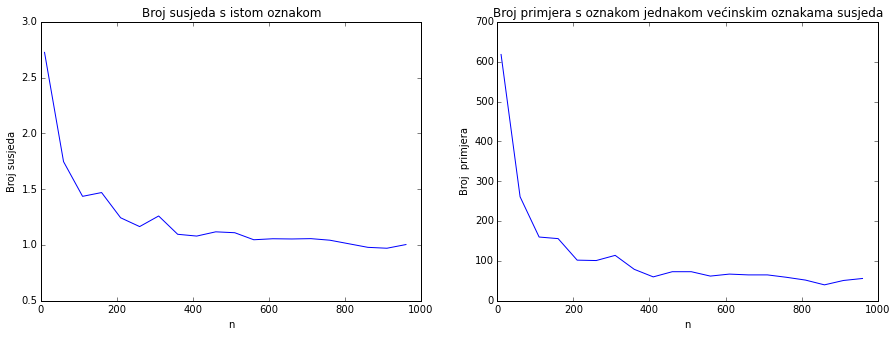

In [171]:
def plot_br(izlaz):
    fig = plt.figure(2,figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.title("Broj susjeda s istom oznakom")
    plt.xlabel("n")
    plt.ylabel("Broj susjeda")
    plt.plot(range(10,970,50),izlaz[:,0])
    fig.add_subplot(1,2,2)
    plt.title("Broj primjera s oznakom jednakom većinskim oznakama susjeda")
    plt.xlabel("n")
    plt.ylabel("Broj  primjera")
    plt.plot(range(10,970,50),izlaz[:,1])
    plt.show()
    
plot_br(izlaz)

**Q:** Je li rezultat očekivan? Obrazložite.
    
**Q:** Uzrokuje li smanjenje broja susjeda koji imaju istu oznaku kao i njihov središnji primjer nužno i smanjenje točnosti klasifikacije? Obrazložite.

Ponovite isti eksperiment i za kosinusnu udaljenost.

10
60
110
160
210
260
310
360
410
460
510
560
610
660
710
760
810
860
910
960


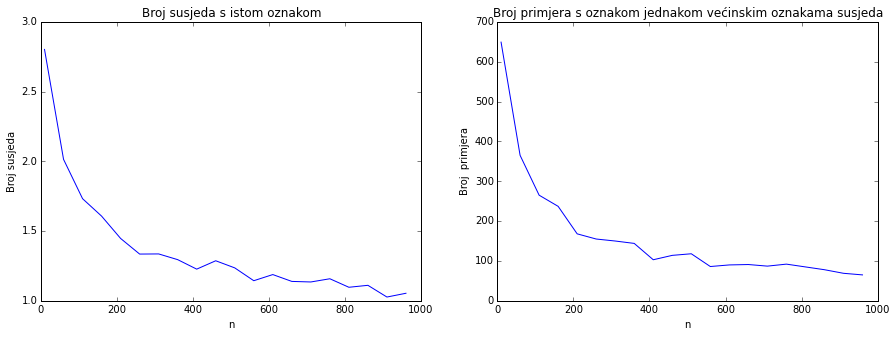

In [185]:
# Vaš kôd ovdje...
import time
izlaz = []
for n in range(10,970,50):
    print(n)
    X, y = make_classification(n_samples=1000, n_features=n,n_classes=5,n_informative=3,n_clusters_per_class=1,random_state=42)
    izlaz.append(eval_neighbors(X,y,metric='cosine'))
    time.sleep(10)
plot_br(np.array(izlaz))

### 5. Primjena algoritma k-nn na skupu "101 Questions"

U ovom zadatku algoritam k-nn primijenit ćemo na skup podataka "101 Questions". Skup sadrži odgovore 99 studenata na 101 dihotomno pitanje kojima iskazuju svoju preferenciju prema jednoj od dviju stvari (npr. "more" vs "planina"). Skup podataka preuzmite odavde:

In [285]:
q101 = pd.read_csv("https://github.com/jsnajder/StrojnoUcenje/raw/master/data/questions101-2015.csv", comment='#')

### (a)

Prvi stupac (oznaka "Ime/pseudonim:") jest ime odnosno pseudonim anketiranog studenta/ice, dok su ostali stupci odgovori na pitanja. Taj je stupac potrebno ukloniti iz podataka (zašto?). Nadalje, na dva od 101 pitanja svih 99 anketiranih studenata dalo je identičan odgovor. Pronađite koja su to dva pitanja ([pomoć](http://stackoverflow.com/questions/30503321/finding-count-of-distinct-elements-in-dataframe-in-each-column)) te ih uklonite (uklonite odgovarajuće retke). U načelu ne bi bio problem da te značajke zadržimo, međutim, zbog načina na koji ćemo napraviti predobradu podataka, opisan u nastavku, bitno je ipak da ih uklonimo.

Odgovori na pitanja kategoričke su slučajne varijable. Premda bismo načelno mogli prijeniti algoritam k-nn na kategoričke značajke, implementacija u sklearnu to ne dopušta, pa je kategoričke značajke potrebno pretvoriti u numeričke. Pretvorba kategoričkih u numeričke značajke tipično se provodi tzv. *one-hot* kodiranjem. Upoznajte se s tim kodiranjem i zašto je ono potrebno: [one-hot encoding](http://stackoverflow.com/questions/17469835/one-hot-encoding-for-machine-learning).

Provedite one-hot kodiranje podataka (nakon izbacivanja dvaju suvišnih stupaca). To možete najlakše učiniti izravno nad pandas-okvirom, funkcijom [`get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

**Q:** Objasnite zašto kategoričke značajke kodiramo one-hot postupkom, a ne nekim drugim (npr. zašto ih jednostavno ne indeksiramo po vrijednostima)?

**Q:** Koja je dimenzija podataka q101 nakon one-hot kodiranja? Zašto?

In [286]:
# Vaš kôd ovdje...
q101mod = q101[ q101.columns[ 1: ] ]
q101mod = q101mod.drop( q101mod.columns[ q101mod.apply( pd.Series.nunique) == 1 ] , axis = 1 )
q101one = pd.get_dummies( q101mod )
q101one.shape

(99, 198)

### (b)

Proučite funkciju [sklearn.neighbors.NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors). Pomoću te funkcije, ispišite za svakog od 99 anketiranih studenata/ica njihovih pet najbližih susjeda po euklidskoj mjeri udaljenosti. Ispišite imena odnosno pseudonim svakog studenta/ice te također imena odnosno pseudonim njihovih pet najbližih susjeda.

In [287]:
from sklearn.neighbors import NearestNeighbors

# Vaš kôd ovdje...
nn = NearestNeighbors()
nn.fit(q101one)
for row in range(q101one.shape[0]):
    indeces = nn.kneighbors([q101one.loc[row]], return_distance=False)
    print("Student "+str(q101.loc[row][q101.columns[0]])+" ima susjede: "+str(list(q101.loc[indeces[0]][q101.columns[0]])))

Student Zdravko Mamic ima susjede: ['Zdravko Mamic', 'kale', 'ja', 'Chiraox', 'Marluk']
Student Josip ima susjede: ['Josip', 'Ante', 'maslačak', 'musketir', 'Gljiva']
Student Ivan Dundović ima susjede: ['Ivan Dundović', 'Filip', 'Kec', 'polo', 'Antiša']
Student Vinkovic Tomo ima susjede: ['Vinkovic Tomo', 'Zdravko Mamic', 'Mateo', 'Ojo', 'Dario']
Student Muškarac24 ima susjede: ['Muškarac24', 'Mimi', 'Jakov Ivančan', 'Filip', 'luka']
Student Ante ima susjede: ['Ante', 'Filip', 'Tin', 'Bojanovski', 'polo']
Student Mateo ima susjede: ['Mateo', 'Chiraox', 'Ojo', 'Ante', 'Vinkovic Tomo']
Student nordlys ima susjede: ['nordlys', 'Luka', 'Antiša', 'Krumpirko', 'Goga']
Student Password123 ima susjede: ['Password123', 'Zlatan', 'Gljiva', 'Kec', 'Jantol']
Student Taylor Bagley ima susjede: ['Taylor Bagley', 'Vicky', 'Jan Tomljanović', 'Filip', 'vrana']
Student Miško ima susjede: ['Miško', 'Pevec', 'staljinove-orgulje', 'nordlys', 'Antiša']
Student Ante ima susjede: ['Ante', 'Josip', 'musketir',

### (c)

Za kategoričke se značajke nerijetko kao mjera udaljenosti koristi [Hammingova udaljenost](https://en.wikipedia.org/wiki/Hamming_distance). Ponovite izračun susjeda za sve primjere iz skupa q101 pomoću Hammingove udaljenosti te usporedite rezultate s onima koje ste dobili s euklidskom udaljenošću.

In [288]:
# Vaš kôd ovdje...
nn = NearestNeighbors(metric='hamming')
nn.fit(q101one)
for row in range(q101one.shape[0]):
    indeces = nn.kneighbors([q101one.loc[row]], return_distance=False)
    print("Student "+str(q101.loc[row][q101.columns[0]])+" ima susjede: "+str(list(q101.loc[indeces[0]][q101.columns[0]])))

Student Zdravko Mamic ima susjede: ['Zdravko Mamic', 'kale', 'ja', 'Chiraox', 'Marluk']
Student Josip ima susjede: ['Josip', 'Ante', 'maslačak', 'musketir', 'Gljiva']
Student Ivan Dundović ima susjede: ['Ivan Dundović', 'Filip', 'Kec', 'polo', 'Antiša']
Student Vinkovic Tomo ima susjede: ['Vinkovic Tomo', 'Zdravko Mamic', 'Mateo', 'Ojo', 'Dario']
Student Muškarac24 ima susjede: ['Muškarac24', 'Mimi', 'Jakov Ivančan', 'Filip', 'luka']
Student Ante ima susjede: ['Ante', 'Filip', 'Tin', 'Bojanovski', 'polo']
Student Mateo ima susjede: ['Mateo', 'Chiraox', 'Ojo', 'Ante', 'Vinkovic Tomo']
Student nordlys ima susjede: ['nordlys', 'Luka', 'Antiša', 'Krumpirko', 'Goga']
Student Password123 ima susjede: ['Password123', 'Zlatan', 'Gljiva', 'Kec', 'Jantol']
Student Taylor Bagley ima susjede: ['Taylor Bagley', 'Vicky', 'Jan Tomljanović', 'Filip', 'vrana']
Student Miško ima susjede: ['Miško', 'Pevec', 'staljinove-orgulje', 'nordlys', 'Antiša']
Student Ante ima susjede: ['Ante', 'Josip', 'musketir',

**Q:** Razlikuju se rezultati? Razlikuje li se euklidska udaljenost od Hammingove za pojedinačne parove primjera iz skupa q101 (provjerite)? Obrazložite.

### (d)

Želimo predvidjeti odgovore na neka pitanja na temelju poznatih odgovora na neka druga pitanja. Predikciju ćemo ostvariti algoritmom k-nn, što zapravo znači da će se predviđanje odvijati tako da će se za poznate odgovore na pitanja najprije pronaći studenti koji su na sličan način odgovorili na ta pitanja (susjedi), a onda će se predikcija izračunati kao njihov većinski odgovor. Odgovore na prvih 49 pitanja koristit ćemo kao poznate odgovore, te pomoću njih pokušati predvidjeti odgovore na ostala 49 pitanja.

Skup q101, binariziran na način kako je opisano u dijelu (a), podijelite po stupcima u dvije polovice (svaka po 49 značajki): prvu polovicu koristit ćemo kao značajke (poznati odgovori), a drugu polovicu čine odgovori koje ćemo pokušati predvidjeti (nepoznati odgovori). Oba ova skupa podijelite na skupove za učenje i ispitivanje u omjeru 7:3.

Za svaki od 49 nepoznatih odgovora, trenirajte po jedan k-nn klasifikator na 49 poznatih odogovora. Klasifikatore naravno trenirajte na skupu za učenje i ispitajte na skupu za ispitivanje. Paralelno s time, za svaki od 49 nepoznatih odgovora trenirajte i po jedan referentni klasifikator, koji će sve primjere jednostavno klasificirati u najčešću klasu za dotično pitanje. U tu svrhu iskoristite model [`sklearn.dummy.DummyClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Sada za svaki od 49 nepoznatih odgovora ispišite točnost klasifikatora k-nn, točnost referentnog klasifikatora te razliku između njih. Dodatno, za svako pitanje ispišite i dva ponuđena odgovora, kako bismo mogli vidjeti za koja to pitanja klasifikator radi dobro.

In [295]:
from sklearn.dummy import DummyClassifier
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_binary = q101one.values

X_train, X_test, Y_train, Y_test = train_test_split(X_binary[:, 0:98], X_binary[:, 98:198], test_size=0.3,random_state=42)

# Vaš kôd ovdje...
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
dm = DummyClassifier()
dm.fit(X_train,Y_train)
dm_pred = dm.predict(X_test)
for i in range(0,50):
    print("Ponuđeni odgovori su : %s, %s" %(q101one.columns[98+i*2].split('_')[1],q101one.columns[98+i*2+1].split('_')[1]))
    print("Knn točnost : \t\t" + str(sum(knn_pred[:,i*2:(i+1)*2]==Y_test[:,i*2:i*2+1])/60.))
    print("Referentna točnost : \t"+ str(sum(dm_pred[:,i*2:(i+1)*2]==Y_test[:,i*2:i*2+1])/60.))
    print()


Ponuđeni odgovori su : Dubrovnik, Pula
Knn točnost : 		0.5
Referentna točnost : 	0.5

Ponuđeni odgovori su : Dolar, Euro
Knn točnost : 		0.5
Referentna točnost : 	0.55

Ponuđeni odgovori su : Nogomet, Rugby
Knn točnost : 		0.5
Referentna točnost : 	0.533333333333

Ponuđeni odgovori su : Konzum, Lidl
Knn točnost : 		0.5
Referentna točnost : 	0.55

Ponuđeni odgovori su : Tele2, Tomato
Knn točnost : 		0.5
Referentna točnost : 	0.55

Ponuđeni odgovori su : Latinica, Ćirilica
Knn točnost : 		0.5
Referentna točnost : 	0.566666666667

Ponuđeni odgovori su : Griz, Čokolino
Knn točnost : 		0.5
Referentna točnost : 	0.45

Ponuđeni odgovori su : David Bowie, Elton John
Knn točnost : 		0.5
Referentna točnost : 	0.483333333333

Ponuđeni odgovori su : Obama, Putin
Knn točnost : 		0.5
Referentna točnost : 	0.5

Ponuđeni odgovori su : Google Chrome, Microsoft IE
Knn točnost : 		0.5
Referentna točnost : 	0.5

Ponuđeni odgovori su : August Šenoa, Petar Preradović
Knn točnost : 		0.5
Referentna točnost :

**Q:** Za koja pitanja klasifikator radi bolje od referentnog modela?
    
**Q:** Zašto za dotična pitanja klasifikator radi dobro, a za druga ne?

### 6. Stabla odluke

U ovom zadatku usredotočit ćemo se na primjenu stabala odluke za problem klasifikacije. Upoznajte se s klasom [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Ako nije rečeno drugačije, koristite pretpostavljene parametre modela. 

Radit ćemo sa skupom podataka *Titanic*. S obzirom na to da taj skup podataka za neke primjere nema vrijednosti svih atributa, a i da su neki atributi nebrojčani, prvo ga trebamo obraditi.

### (a)

Prvo učitajte skup podataka _Titanic_ i izdvojite samo sljedeće atribute: _Pclass, Sex, Age, SibSp, Parch,_ i _Embarked_. To su značajke s kojima ćemo raditi. Ciljnu klasu predstavlja atribut _Survived_.

In [262]:
df = pd.read_csv('https://raw.githubusercontent.com/jsnajder/StrojnoUcenje/master/data/titanic-train.csv')

# Vaš kôd ovdje...
titanic=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked','Survived']]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


**Q:** Pogledajte ostale značajke u skupu podataka. Smatrate li da bi bilo dobro uključiti još koju? Zašto?

### (b)

Koristeći razred [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) pretvorite nebrojčane atribute _Sex_ i _Embarked_ u numeričke (ovakav pristup moguć je kod stabala odluke, ali inače se koristi [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

In [263]:
from sklearn.preprocessing import LabelEncoder

# Vaš kôd ovdje...
le = LabelEncoder()
titanic['Sex']=le.fit_transform(titanic['Sex'])
titanic.replace(NaN,'Z',True)
titanic['Embarked']=le.fit_transform(titanic['Embarked'])

/home/ante/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ante/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ante/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

**Q:** Mogli smo koristiti i spomenuti _hot-one encoding_. Zašto to kod stabala odluke često ipak nije najbolja ideja?

### (c) 

U skupu podataka _Titanic_ za neke primjeri nisu poznate vrijednosti svih atributa. Proučite razred [`Imputer`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) i pomoću njega riješite ovaj problem tako da nedostajuće vrijednosti zamijenite najčešćom vrijednošću dotičnog atributa kroz primjere.

In [264]:
from sklearn.preprocessing import Imputer

# Vaš kôd ovdje...
titanic.replace('Z',3,True)
im = Imputer(missing_values=3,strategy='most_frequent',axis=1,copy=False)
titanic['Embarked']=im.fit_transform(titanic['Embarked'])[0]
titanic['Age']=im.fit_transform(titanic['Age'])[0]

/home/ante/anaconda3/lib/python3.4/site-packages/pandas/core/common.py:516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x
/home/ante/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ante/anaconda3/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/ante/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

### (d)

Na tako pripremljenome skupu _Titanic_ trenirajte stablo odluke (klasa `DecisionTreeClassifier`). Izgradite dva stabla koristeći dva različita kriterija oabira korijenskog čvora (parametar `criterion`): `entropy` (informacijska dobit) i `gini` (Ginijev indeks). Ispitajte modele na cijelom skupu (istom na kojem ste ih i trenirali) te ispišite točnost modela. Nadalje, član `feature_importances_` sadrži polje kriterijskih vrijednosti za svaki atribut. Ispišite te vrijednosti za oba modela.

In [278]:
from sklearn.tree import DecisionTreeClassifier

# Vaš kôd ovdje...
tit = titanic.values
first = DecisionTreeClassifier(criterion='entropy')
second = DecisionTreeClassifier()
first.fit(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']],titanic[['Survived']])
second.fit(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']],titanic[['Survived']])

print("Entropy acc : %f" % first.score(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']],titanic[['Survived']]))
print("Gini acc : %f " % second.score(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']],titanic[['Survived']]))

print("Entropy feature importances : "+ str(first.feature_importances_))
print("Gini feature importances : "+ str(first.feature_importances_))

Entropy acc : 0.937149
Gini acc : 0.937149 
Entropy feature importances : [ 0.14978321  0.2838779   0.34489746  0.10259509  0.06866156  0.05018477]
Gini feature importances : [ 0.14978321  0.2838779   0.34489746  0.10259509  0.06866156  0.05018477]


**Q:** Usporedite rezultate modela s kriterijem `entropy` i `gini`. Postoji li razlika? Zašto?

**Q:** Zašto pogreška učenja nije jednaka nuli? Bi li to trebala biti?

**Q:** Koja značajka je korijenska značajka prema kriteriju `entropy`, a koja prema kriteriju `gini`?

### 7. Regularizacija stabala odluke

Pri izgradnji stabla odluke vrlo lako može doći do prenaučenosti s obzirom na to da stablo raste dok se svi primjeri za učenje ispravno ne klasificiraju. Jedan od načina sprječavanja prenaučenosti jest zaustavljanje rasta stabla na određenoj dubini. Spomenuto ograničenje regulira se pomoću parametra `max_depth` konstruktora razreda `DecisionTreeClassifier`.

Podijelite skup podataka _Titanic_ na skup za učenje i na skup za ispitivanje u omjeru 2:3 korištenjem funkcije [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html).

Iscrtajte krivulje pogrešaka na skupu za učenje i na skupu za ispitivanje za svaki parametar maksimalne dubine $d$, pri čemu je $d \in \{1,2,\ldots,30\}$. Koristite Ginijev indeks.

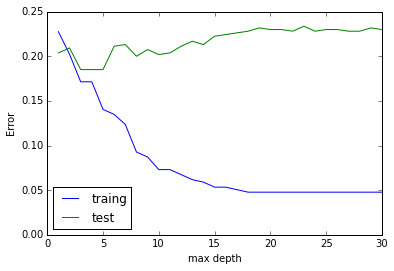

In [279]:
from sklearn.cross_validation import train_test_split

# Vaš kôd ovdje...
X_train, X_test, Y_train, Y_test = train_test_split(titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']], titanic[['Survived']], test_size=0.6,random_state=42)
train = []
test = []
for i in range(1,31):
    dt  = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,Y_train)
    train.append(1-dt.score(X_train,Y_train))
    test.append(1-dt.score(X_test,Y_test))
plt.xlabel("max depth")
plt.ylabel("Error")
plt.plot(range(1,31),train,label="traing")
plt.plot(range(1,31),test,label="test")
plt.legend(loc="best")
plt.show()

**Q:** Na koju biste dubinu ograničili rast stabla i zašto?
    
**Q:** Kojoj strani u grafikonu odgovara područje prenaučenosti, a kojoj područje podnaučenosti?

### 8. Matrice zabune i evaluacijske mjere

Kako bismo se uvjerili koliko naš naučeni model zapravo dobro radi, nužno je provesti evaluaciju modela. Ovaj korak od presudne je važnosti u svim primjenama strojnog učenja, pa je stoga bitno znati provesti evaluaciju na ispravan način. Cilj ovog zadatka jest upoznati se s osnovnim evaluacijskim mjerama temeljenima na matrici zabune (engl. *confusion matrix*).

Preuzmite Glass Identification Data Set, koji opisuje rezultate kemijske analize 214 stakala. Riječ je o klasifikacijskom problemu sa šest klasa: na temelju 9 kemijskih značajki stakla potrebno je, u svrhu forenzičke analize, odrediti o kojoj se od šest vrsta stakla radi. Skup podataka možete učitati na sljedeći način:

In [297]:
data = sp.loadtxt("/home/ante/Desktop/glass.data", delimiter=',')
glass_X, glass_y = data[:,1:10], data[:,10]

Ovaj skup podataka ne sadrži nenumeričke atribute niti nedostajuće vrijednosti, stoga ne treba raditi nikakvu obradu. Podijelite skup primjera na skup za učenje i na skup za ispitivanju u omjeru 2:3 (koristite funkciju `train_test_split`). Izgradite stablo odluke na temelju dobivenog skupa za učenje.

In [298]:
## Vaš kôd ovdje...
X_train, X_test, y_train, y_test = train_test_split(glass_X,glass_y, test_size=0.6,random_state=42)
dt  = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### (a)

Definirajte funkciju `create_confusion_matrix(y_true, y_pred)` koja generira matricu zabune dimenzija $K\times K$, gdje je $K$ broj klasa. Funkcija prima stvarne oznake primjera (`y_true`) i oznake predikcije modela (`y_pred`) te vraća (1) matricu zabune i (2) polje oznaka klasa (gdje su klase poredane onako kako su poredane u matrici zabune). Retci matrice neka odgovaraju stvarnim oznakama (true), a stupci predikcijama modela (pred).

In [303]:
# Vaš kôd ovdje...
def create_confusion_matrix(y_true, y_pred):
    K  = np.unique(y_true)
    K.sort()
    matrica = np.array(zeros((len(K),len(K))))
    for i, true  in  enumerate(K):
        lista_true = y_pred[y_true==true]
        for j, pred in enumerate(K):
            matrica[i,j]=sum(lista_true==pred)
    return matrica, K

Izračunajte i ispišite matricu zabune za stablo odluke na ispitnome dijelu skupa `glass`. Uvjerite se da vaša implementacija radi jednako kao funkcija [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [353]:
from sklearn.metrics import confusion_matrix
print(create_confusion_matrix(y_test,dt.predict(X_test)))
print(confusion_matrix(y_test,dt.predict(X_test)))

(array([[ 31.,   6.,   3.,   0.,   0.,   2.],
       [ 11.,  27.,   6.,   1.,   1.,   2.],
       [  3.,   3.,   5.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   7.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   2.,   4.],
       [  0.,   1.,   0.,   0.,   2.,  11.]]), array([ 1.,  2.,  3.,  5.,  6.,  7.]))
[[31  6  3  0  0  2]
 [11 27  6  1  1  2]
 [ 3  3  5  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0  2  4]
 [ 0  1  0  0  2 11]]


**Q:** Koja je klasa najbrojnija?
    
**Q:** Koja klasa ima najviše pogrešnih pozitivnih klasifikacija (false positives), a koja najviše pogrešnih negativnih klasifikacija (false negatives)?

### (b)

Definirajte funkciju `twoway_confusion_matrix(cm, i)` koja prima matricu zabune `cm` dimenzija $K\times K$ i indeks klase $i$ te izračunava binarnu matricu zabune za klasu $i$ kao pozitivnu klasu.

In [308]:
# Vaš kôd ovdje...
def twoway_confusion_matrix(cm, i):
    matrica = np.array(zeros((2,2)))
    leng= cm.shape[0]
    TP = cm[i,i]
    FP = 0
    FN = 0
    TN = 0
    for j in range(leng):
        if j != i:
            FP+=cm[j,i]
            FN+=cm[i,j]
    for j in range(leng):
        for k in range(leng):
            if i != j and i != k :
                TN+=cm[j,k]
    matrica[0,0]=TP
    matrica[0,1]=FP
    matrica[1,0]=FN
    matrica[1,1]=TN
    return matrica

Izračunajte i ispišite binarne matrice zabune za svih 6 klasa iz skupa `glass`.

In [312]:
cm,clas = create_confusion_matrix(y_test,dt.predict(X_test))
for i,k in enumerate(clas):
    print("Razred "+str(k))
    print(twoway_confusion_matrix(cm,i))

Razred 1.0
[[ 31.  14.]
 [ 11.  73.]]
Razred 2.0
[[ 27.  11.]
 [ 21.  70.]]
Razred 3.0
[[   5.    9.]
 [   6.  109.]]
Razred 5.0
[[   7.    1.]
 [   1.  120.]]
Razred 6.0
[[   2.    3.]
 [   4.  120.]]
Razred 7.0
[[  11.    8.]
 [   3.  107.]]


### (c)

Pomoću funkcija iz (a) i (b) dijela zadatka, definirajte funkcije `accuracy`, `precision`, `recall` i `f1` za izračun točnosti, preciznosti, odziva odnosno F1-mjere. Svaka od ovih funkcija uzima kao argumente stvarne oznake primjera `y_true` i predviđene oznake `y_pred`. Funkcije trebaju izračunavati mikro i makro varijante ovih mjera, što se određuje opcijom `averaging=micro` odnosno `averaging=macro` (podrazumijevana vrijednost).

Izračunajte vrijednosti ovih evaluacijskih mjera na skupu `glass`. Uvjerite da vaša implementacija daje identične rezultate kao funkcije iz paketa [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Ove funkcije pretpostavljaju makro-mjere, osim one za F1 koja može primiti i parametar koji definira hoće li se izračunati mikro ili makro vrijednost.

In [367]:
def accuracy(y_true,y_predict,averaging='macro'):
    cm,clas = create_confusion_matrix(y_true,y_predict)
    matrica = np.array([])
    for i in range(clas.shape[0]):
        if len(matrica)==0 :
            matrica = twoway_confusion_matrix(cm,i).reshape(1,4)
        else:
            matrica = np.vstack((matrica,twoway_confusion_matrix(cm,i).reshape(1,4)))
    if averaging == 'macro' :
        acc = np.array([])
        for i in range(clas.shape[0]):
            TP,FP,FN,TN = matrica[i]
            acc = np.hstack((acc,(TP+TN)/(TP+TN+FP+FN)))
        return np.mean(acc)
    else:
        TP,FP,FN,TN = np.sum(matrica,axis=0)
        return (TP+TN)/(TP+TN+FP+FN)
    
def precision(y_true,y_predict,averaging='macro'):
    cm,clas = create_confusion_matrix(y_true,y_predict)
    matrica = np.array([])
    for i in range(clas.shape[0]):
        if len(matrica)==0 :
            matrica = twoway_confusion_matrix(cm,i).reshape(1,4)
        else:
            matrica = np.vstack((matrica,twoway_confusion_matrix(cm,i).reshape(1,4)))
    if averaging == 'macro' :
        p = np.array([])
        for i in range(clas.shape[0]):
            TP,FP,FN,TN = matrica[i]
            p = np.hstack((p,TP/float(TP+FP)))
        return np.mean(p)
    else:
        TP,FP,FN,TN = np.sum(matrica,axis=0)
        return TP/float(TP+FP)
        
def recall(y_true,y_predict,averaging='macro'):
    cm,clas = create_confusion_matrix(y_true,y_predict)
    matrica = np.array([])
    for i in range(clas.shape[0]):
        if len(matrica)==0 :
            matrica = twoway_confusion_matrix(cm,i).reshape(1,4)
        else:
            matrica = np.vstack((matrica,twoway_confusion_matrix(cm,i).reshape(1,4)))
    if averaging == 'macro' :
        r = np.array([])
        for i in range(clas.shape[0]):
            TP,FP,FN,TN = matrica[i]
            r = np.hstack((r,TP/float(TP+FN)))
        return np.mean(r)
    else:
        TP,FP,FN,TN = np.sum(matrica,axis=0)
        return TP/float(TP+FN)
    
def f1(y_true,y_predict,beta=1,averaging='macro'):
    cm,clas = create_confusion_matrix(y_true,y_predict)
    matrica = np.array([])
    for i in range(clas.shape[0]):
        if len(matrica)==0 :
            matrica = twoway_confusion_matrix(cm,i).reshape(1,4)
        else:
            matrica = np.vstack((matrica,twoway_confusion_matrix(cm,i).reshape(1,4)))
    if averaging == 'macro' :
        f = np.array([])
        for i in range(clas.shape[0]):
            TP,FP,FN,TN = matrica[i]
            p = TP/float(TP+FP)
            r = TP/float(TP+FN)
            f = np.hstack((f,(1+beta)*p*r/(p+r)))
        return np.mean(f)
    else:
        TP,FP,FN,TN = np.sum(matrica,axis=0)
        
        p = TP/float(TP+FP)
        r = TP/float(TP+FN)
        return (1+beta)*p*r/(p+r)

In [371]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print("Accuracy")
print(accuracy_score(y_test,dt.predict(X_test)))
print(accuracy(y_test,dt.predict(X_test)))
print()

print("Precision")
print(precision_score(y_test,dt.predict(X_test),average='micro'))
print(precision(y_test,dt.predict(X_test),averaging='micro'))
print()

print("Recall")
print(recall_score(y_test,dt.predict(X_test),average='micro'))
print(recall(y_test,dt.predict(X_test),averaging='micro'))
print()

print("f1")
print(f1_score(y_test,dt.predict(X_test),average='micro'))
print(f1(y_test,dt.predict(X_test),averaging='micro'))

Accuracy
0.643410852713
0.881136950904

Precision
0.643410852713
0.643410852713

Recall
0.643410852713
0.643410852713

f1
0.643410852713
0.643410852713


**Q:** Usporedite mikro-F1 i makro-F1. Koja je vrijednost veća? Je li to očekivano i zašto?

**Q:** Koji je odnos između mjera preciznosti, odziva i F1-mjere? Može li F1-mjera biti veća od preciznosti ili odziva? Obrazložite.

**Q:** Zašto su vrijednosti mikro-preciznosti, mikro-odziva i mikro-F1 identične? Hoće li to uvijek biti slučaj?